In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
from tabulate import tabulate
import math
from scipy.stats import norm

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode
init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings("ignore")


import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import matplotlib.gridspec as gridspec

# yahoo_finance is used to fetch data 
import yfinance as yf

from datetime import datetime
from dateutil.relativedelta import relativedelta

one_yr_ago = datetime.now() - relativedelta(years=1) - relativedelta(days=15)
one_yr_ago = one_yr_ago.strftime("%Y-%m-%d")

print(one_yr_ago)
print(end)
start = '2022-07-15'
end = '2023-07-15'
symbols = ['FDS','INVH', 'ROL', 'RBLX', 'HIG', 'SNOW']

df_all = yf.download(symbols, start, end)

df = yf.download(symbols, start, end)['Adj Close']

2022-07-15
2023-07-15
[*********************100%***********************]  6 of 6 completed
[*********************100%***********************]  6 of 6 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


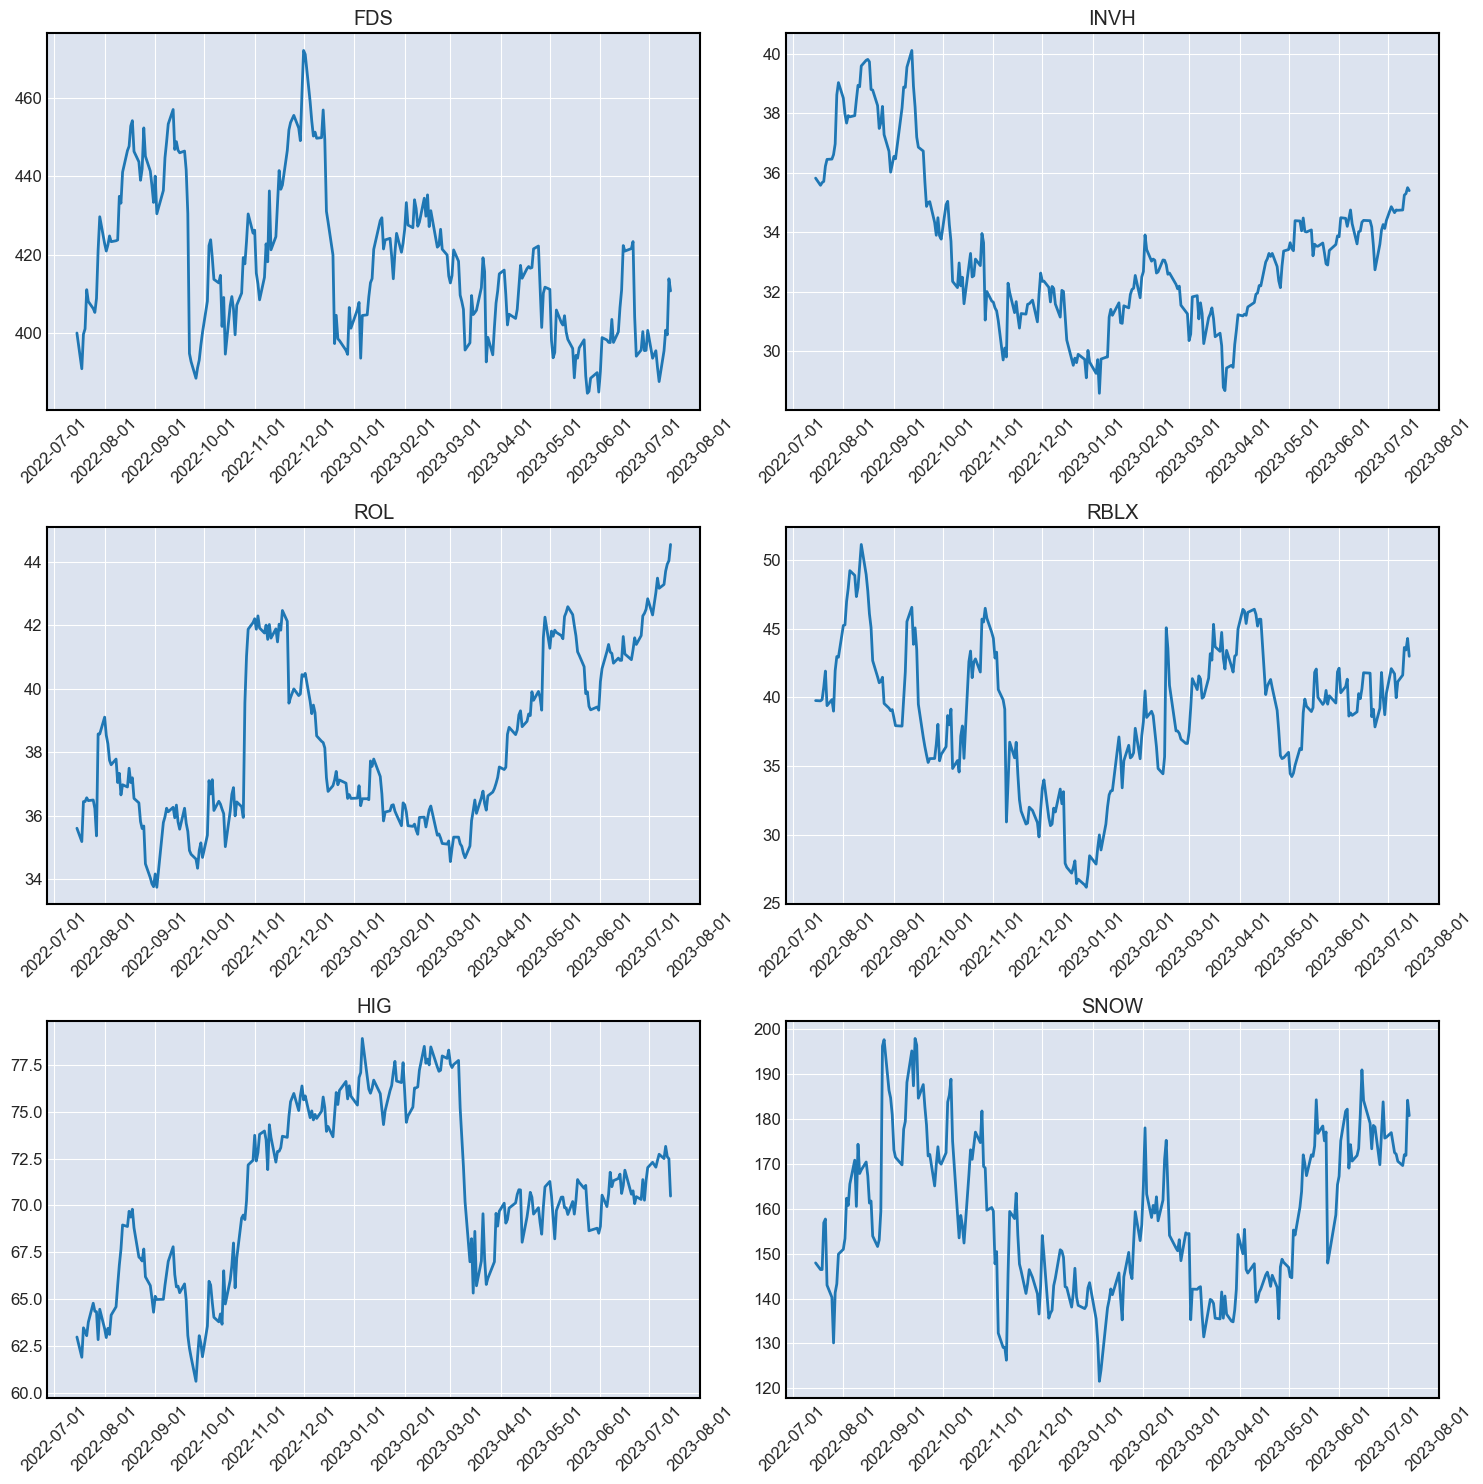

In [68]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.dates as mdates
import yfinance as yf

symbols = ['FDS','INVH', 'ROL', 'RBLX', 'HIG', 'SNOW']

def plot_stock(symbol, ax):
    df_stock = yf.download(symbol, start, end)

    ax.plot(df_stock.index, df_stock.Close, label=symbol)
    ax.set_title(symbol)
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis_date()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    
    # Rotate X-Axis labels for each subplot
    for label in ax.get_xticklabels():
        label.set_rotation(45)
    
    ax.grid(True)

fig = plt.figure(figsize=(15, 15))
gs = gridspec.GridSpec(3, 2) 

for i, symbol in enumerate(symbols):
    ax = fig.add_subplot(gs[i])
    plot_stock(symbol, ax)

plt.tight_layout()
plt.show()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


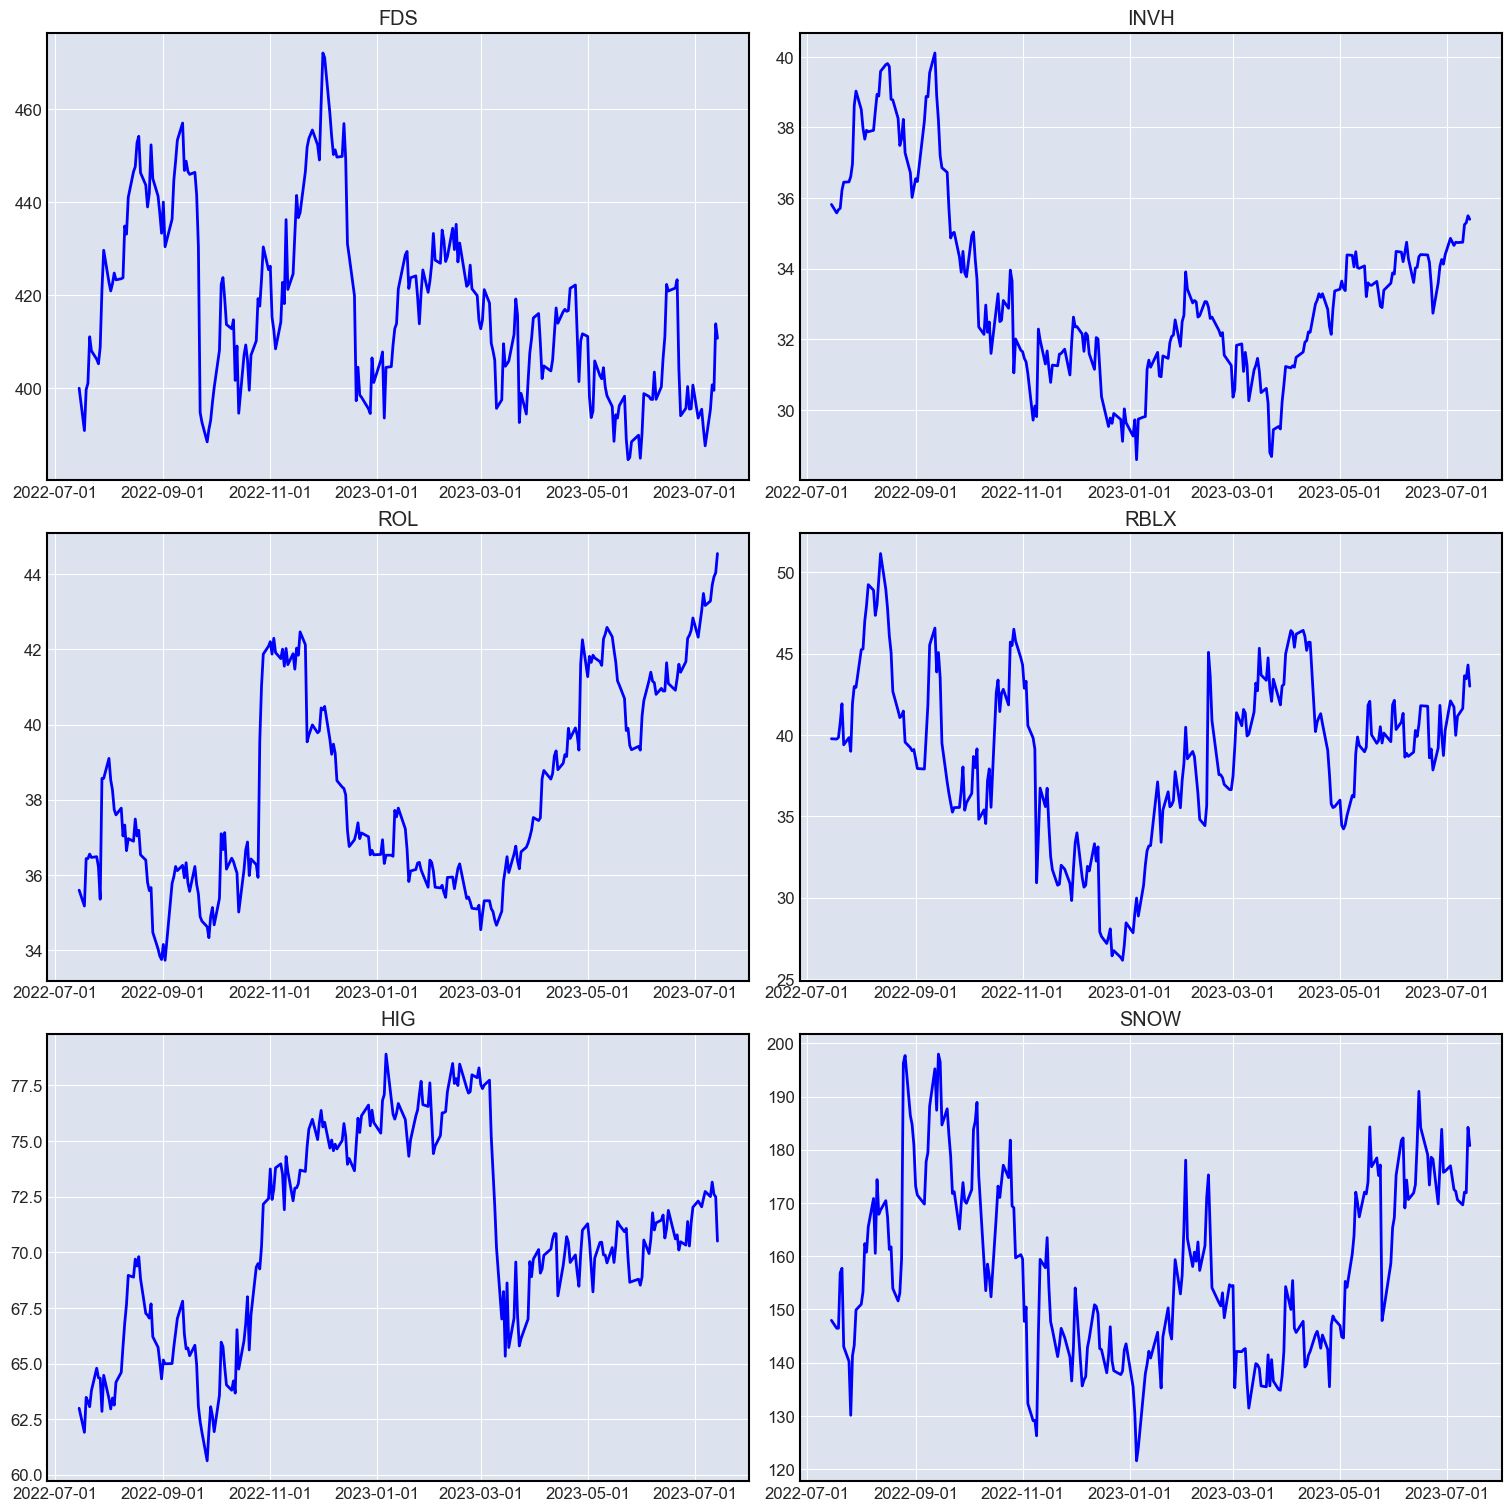

In [64]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
import yfinance as yf
import pandas as pd

symbols = ['FDS','INVH', 'ROL', 'RBLX', 'HIG', 'SNOW']

def plot_candlestick(data, ax):
    # Convert the datetime object to mdates date
    data['Date'] = [mdates.date2num(d) for d in data.index]
    # Create tuples in the form (date, open, high, low, close)
    # quotes = [tuple(x) for x in data[['Date', 'Open', 'High', 'Low', 'Close']].values]
    
    ax.xaxis_date()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax.grid(True)
    
    ax.plot(data['Date'], data['Close'], color='b')

fig, axs = plt.subplots(3, 2, figsize=(15, 15), constrained_layout=True)

for i, symbol in enumerate(symbols):
    data = yf.download(symbol, start=start, end=end)
    plot_candlestick(data, axs[i//2, i%2])
    axs[i//2, i%2].set_title(symbol)
    
plt.show()


# FDS trades a lot Higher and has more volitality

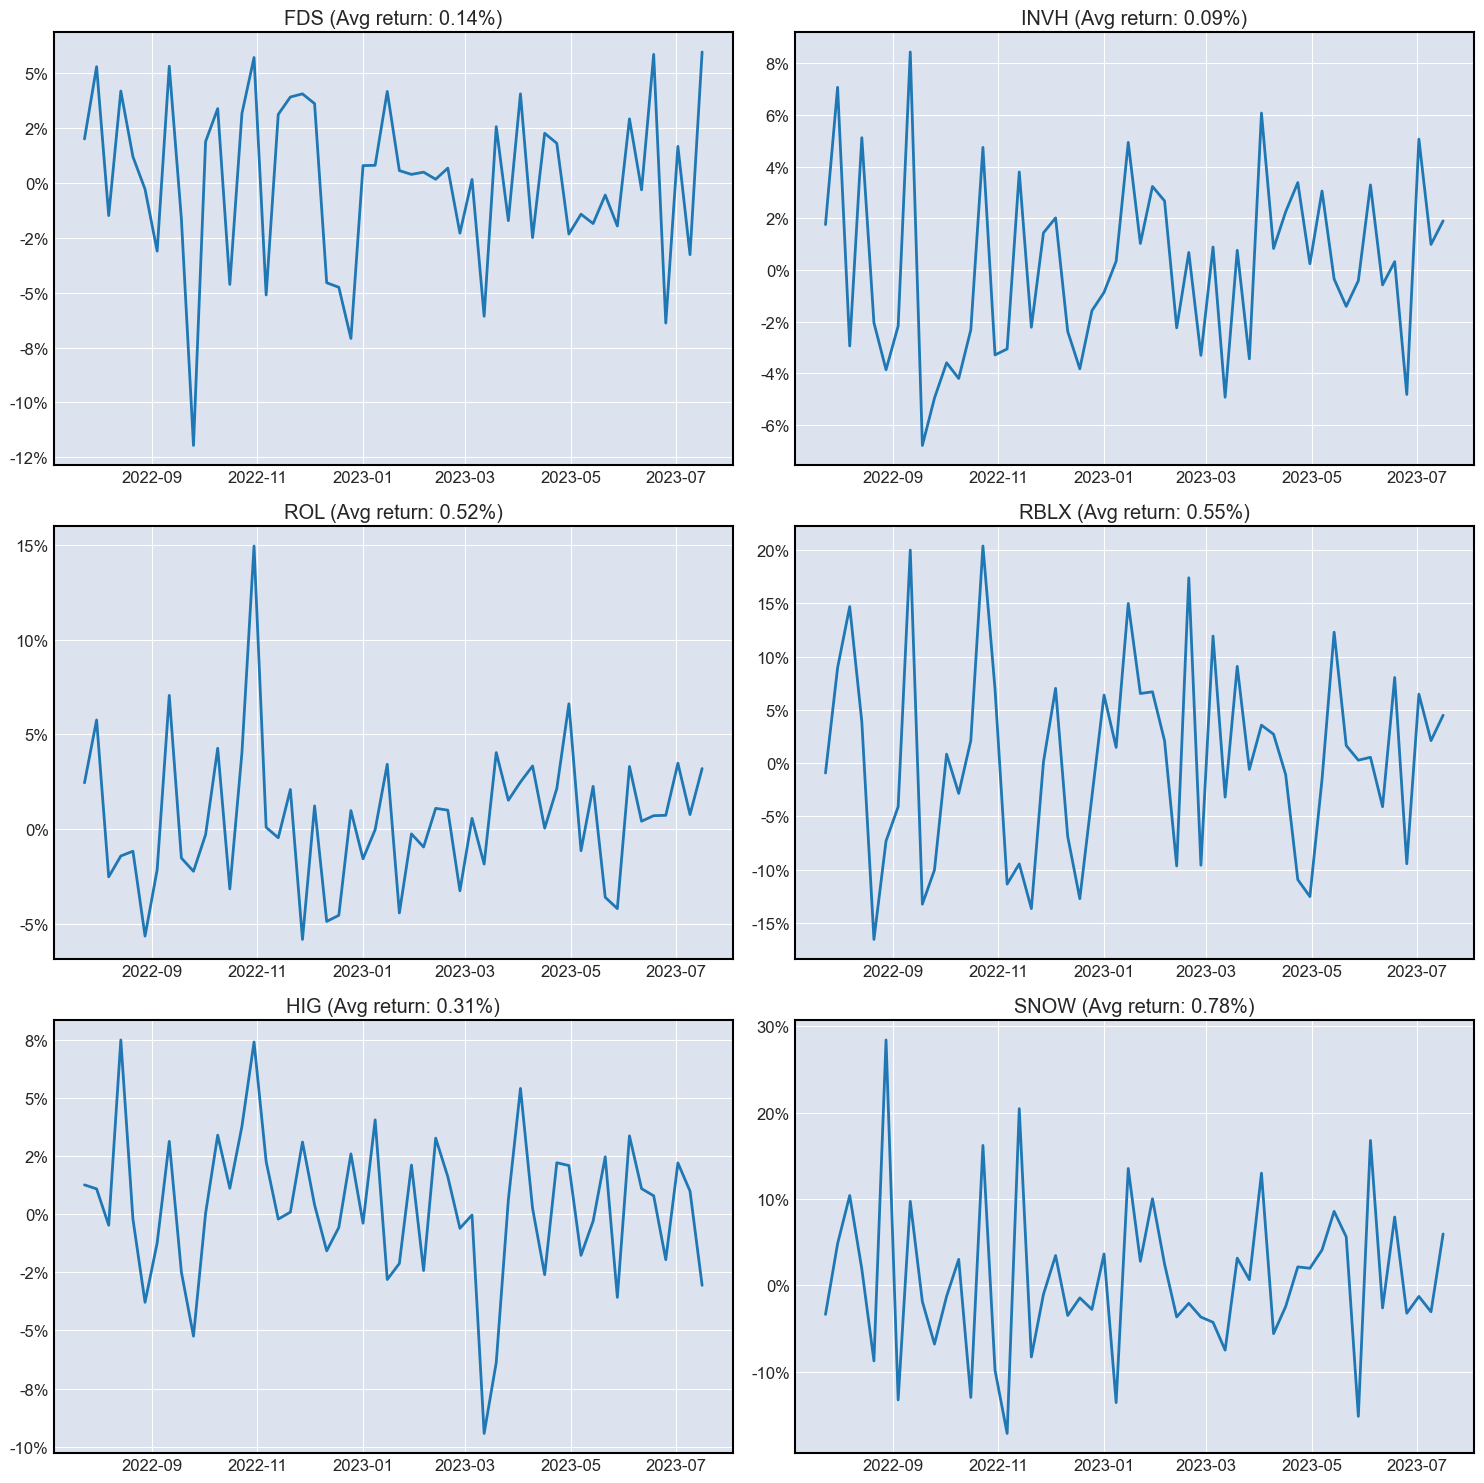

In [74]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.ticker as mtick


fmt = '%.0f%%' 
yticks = mtick.FormatStrFormatter(fmt)

returns_df = df.resample('W').last().pct_change().dropna()

symbols = ['FDS','INVH', 'ROL', 'RBLX', 'HIG', 'SNOW']

fig = plt.figure(figsize=(15, 15))
gs = gridspec.GridSpec(3, 2)

for i, symbol in enumerate(symbols):
    ax = fig.add_subplot(gs[i])
    ax.plot(returns_df.index, returns_df[symbol]*100)
    ax.grid(True)
    ax.yaxis.set_major_formatter(yticks) 

    avg_return = returns_df[symbol].mean() * 100
    
    # Add average return to the title
    ax.set_title(f'{symbol} (Avg return: {avg_return:.2f}%)')

plt.tight_layout()
plt.show()



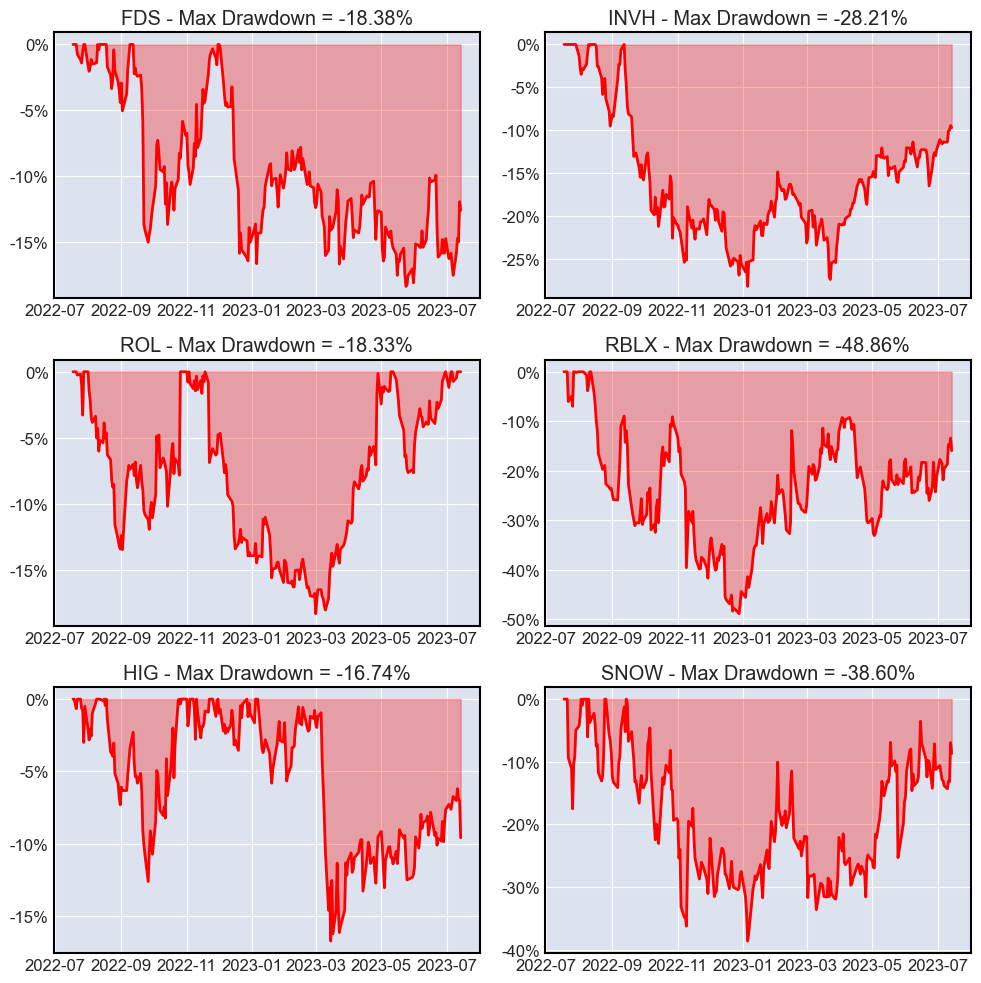

In [87]:
# import matplotlib.gridspec as gridspec

# def plot_drawdown(df, ax, symbole: str):
#     # Calculate cumulative returns
#     cum_returns = (df.pct_change()+1).cumprod()
    
#     # Calculate running max
#     running_max = np.maximum.accumulate(cum_returns.dropna())
#     running_max[cum_returns.index[0]] = cum_returns.iloc[0] # so the graph starts at the appropriate level
    
#     # Calculate underwater curve
#     underwater = -100*(1 - cum_returns/running_max)
    
#     # Calculate maximum drawdown
#     max_dd = underwater.min()
    
#     # Plot the underwater curve
#     ax.plot(underwater, color='red', label=symbol)
#     ax.fill_between(underwater.index, underwater, color='red', alpha=0.3)
#     ax.set_title('Max Drawdown = {:.2f}%'.format(max_dd))
#     ax.legend()

# fig = plt.figure(figsize=(10, 10))
# gs = gridspec.GridSpec(3, 2) # Adjust this to match the number of rows and columns in your subplot grid

# for i, symbol in enumerate(symbols):
#     ax = fig.add_subplot(gs[i])
#     ax.set_title(symbol, fontsize = 20)
#     plot_drawdown(df[symbol], ax, symbol)

# plt.tight_layout()
# plt.show()

import matplotlib.gridspec as gridspec

fmt = '%.0f%%' 
yticks = mtick.FormatStrFormatter(fmt)

def plot_drawdown(df, ax, symbol):
    # Calculate cumulative returns
    cum_returns = (df.pct_change()+1).cumprod()
    
    # Calculate running max
    running_max = np.maximum.accumulate(cum_returns.dropna())
    running_max[cum_returns.index[0]] = cum_returns.iloc[0] # so the graph starts at the appropriate level
    
    # Calculate underwater curve
    underwater = -100*(1 - cum_returns/running_max)
    
    # Calculate maximum drawdown
    max_dd = underwater.min()
    
    # Plot the underwater curve
    ax.plot(underwater, color='red') # Remove label
    ax.fill_between(underwater.index, underwater, color='red', alpha=0.3)
    ax.yaxis.set_major_formatter(yticks) 
    
    # Set title to include symbol and max drawdown
    ax.set_title(f'{symbol} - Max Drawdown = {max_dd:.2f}%')

fig = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(3, 2) # Adjust this to match the number of rows and columns in your subplot grid

symbols = ['FDS','INVH', 'ROL', 'RBLX', 'HIG', 'SNOW'] # example symbols
for i, symbol in enumerate(symbols):
    ax = fig.add_subplot(gs[i])
    plot_drawdown(df[symbol], ax, symbol)

plt.tight_layout()
plt.show()


# ROL, INVH and FDS have left skewness while HIG and RBLX skew (slightly) towards higher values

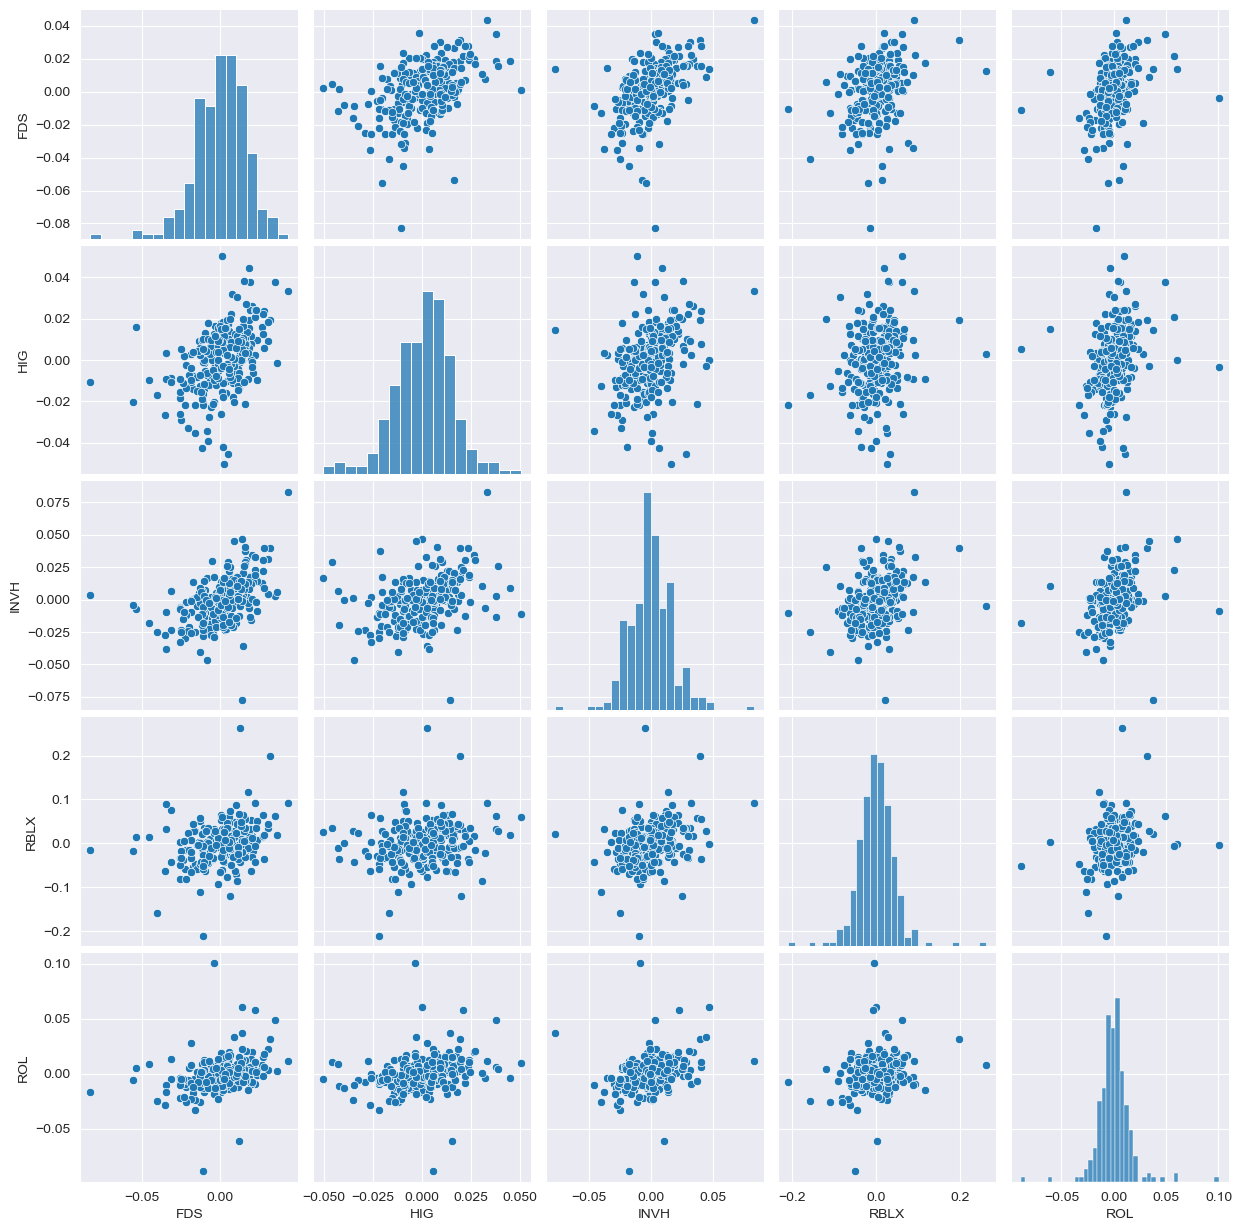

In [18]:
sns.pairplot(returns_df)

# ROL and HIG have very variable densities, with ROL almost seperating into two distributions

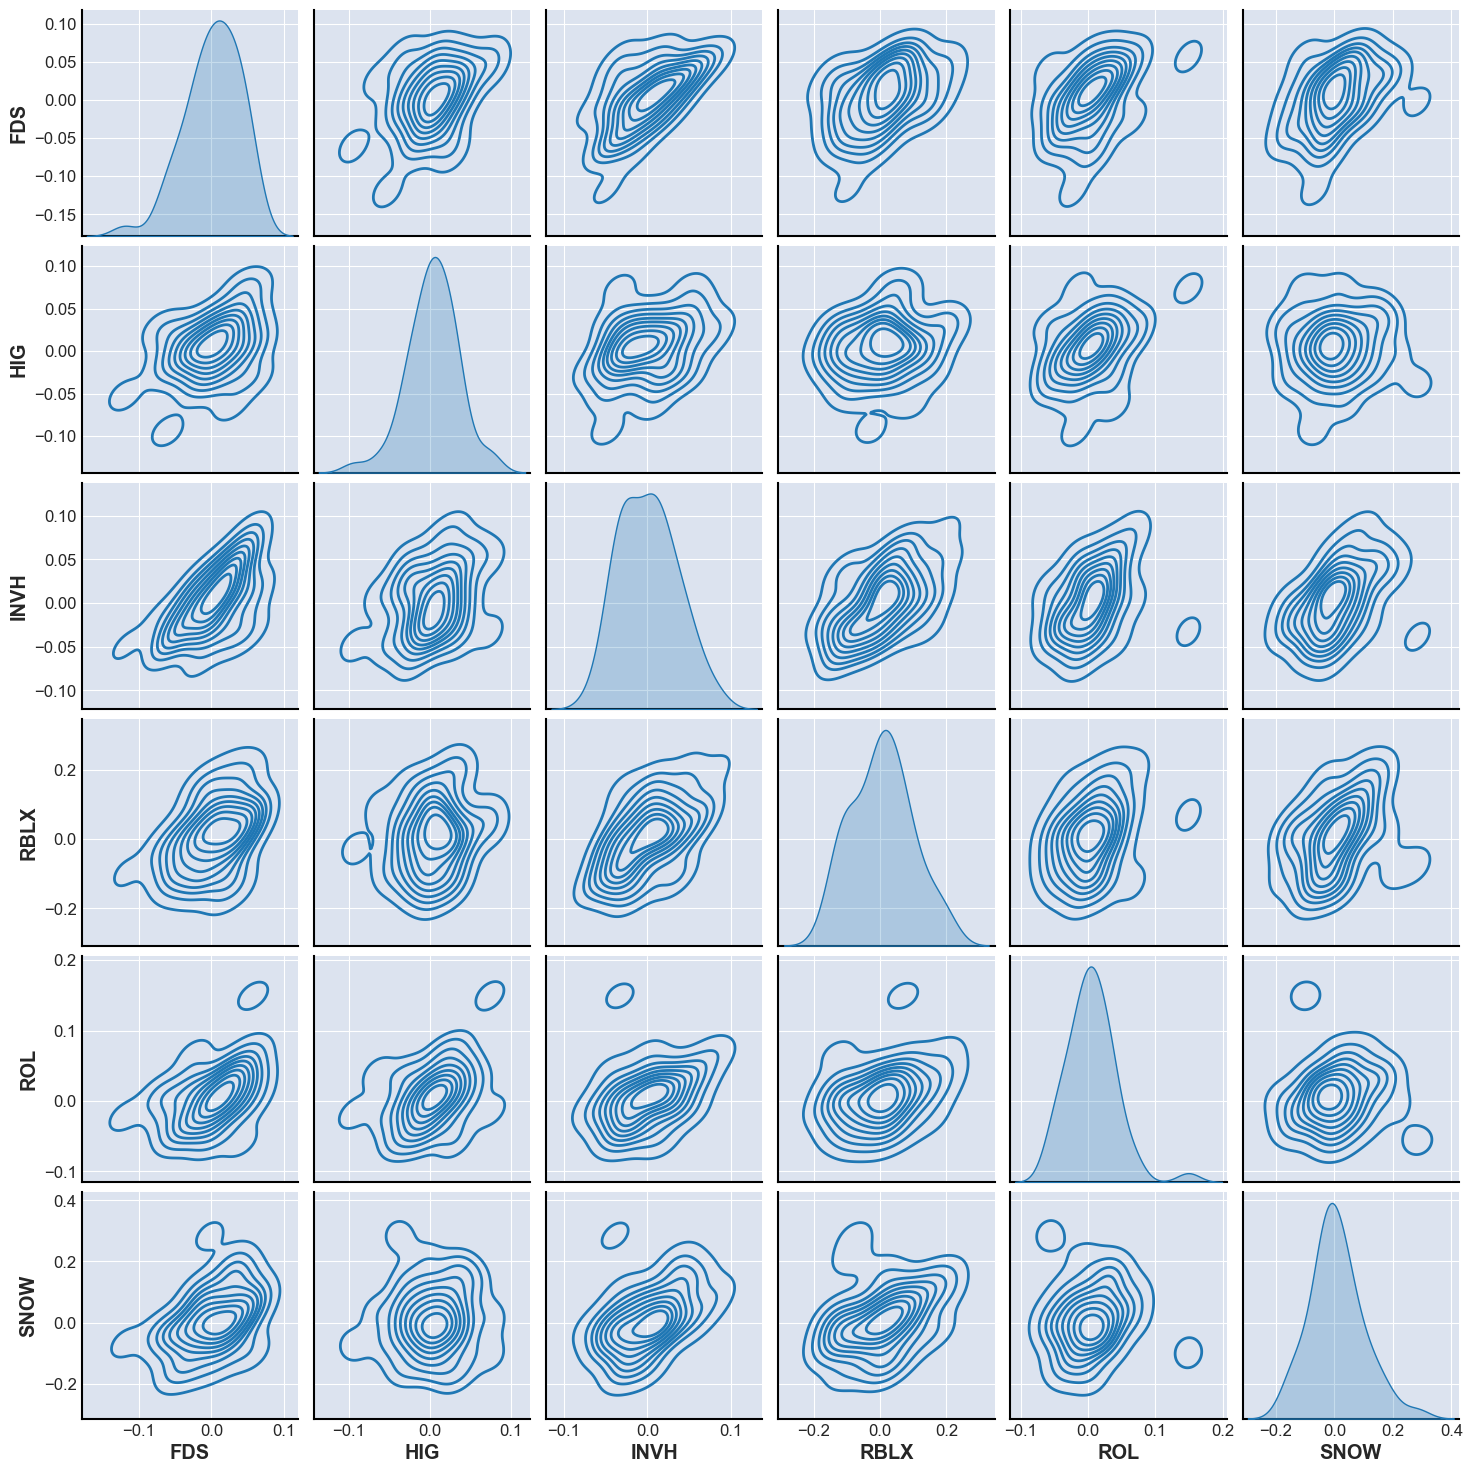

In [88]:
sns.pairplot(returns_df, kind="kde")

[*********************100%***********************]  7 of 7 completed
[*********************100%***********************]  7 of 7 completed


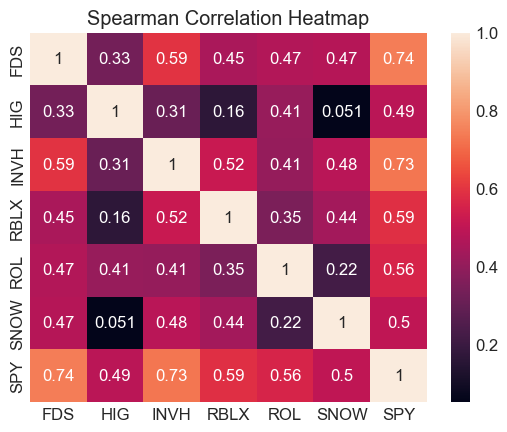

In [93]:
symbols = ['FDS','INVH', 'ROL', 'RBLX', 'HIG', 'SNOW','SPY']

df_all = yf.download(symbols, start, end)

df = yf.download(symbols, start, end)['Adj Close']

returns_df = df.resample('W').last().pct_change().dropna()

sns.heatmap(returns_df.corr(method='spearman'), annot=True)

plt.title('Spearman Correlation Heatmap')
plt.show()

# Take a look at the overall report for more details 

In [99]:
from ydata_profiling import ProfileReport
profile = ProfileReport(returns_df, title="Profiling Report")

In [100]:
profile.to_file("report.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 43.87it/s]


In [98]:
profile.to_notebook_iframe()

ModuleNotFoundError: No module named 'ipywidgets'

In [95]:
!pip install ydata_profiling


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.3/356.3 kB 3.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.6/159.6 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 652.9/652.9 kB 12.0 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 21.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 17.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 26.0 MB/s eta 0:00:00a 0:00:01
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27082 sha256=97039f92717c02470ff17c2593a71cc1f9497ff5baeba46bb4f42920124712a9
  Stored in directory: /Users/alexhanvey/Library/Caches/pip/wheels/28/f3/26/826f91b0c848ff98f1725cd43014a6f3a2d961114157d